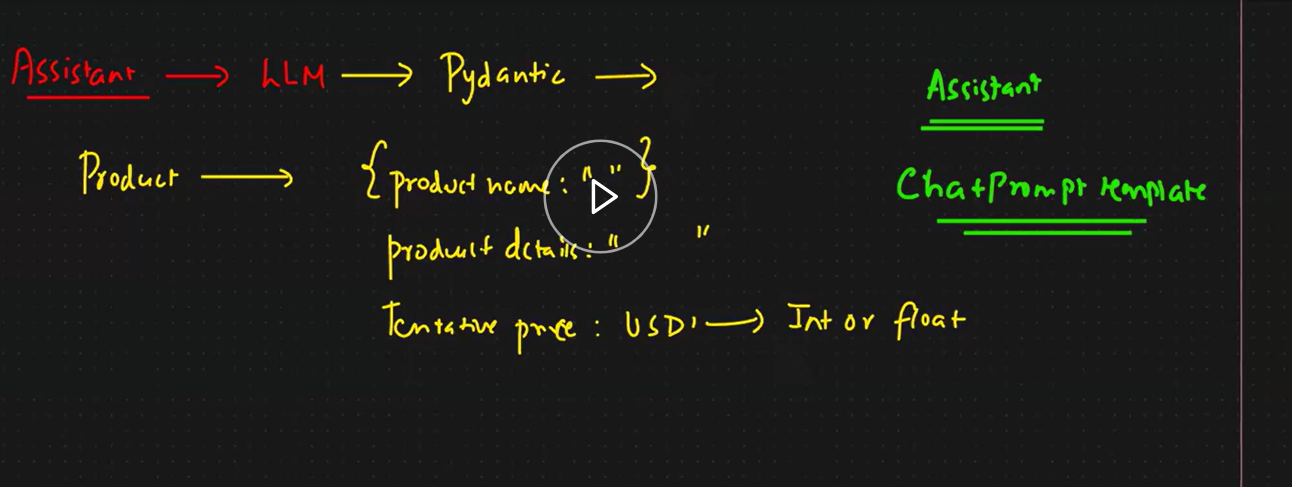

- Create a simple assistant that uses any LLM and should be pydantic, when we ask about any product it should give you two information productName, product details, and tentative price in USD (integer). Use Chat Prompt Template

In [36]:
import os 
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.runnables import RunnablePassthrough, RunnableMap

load_dotenv()

True

In [19]:
groq_api_key = os.getenv('GROQ_API_KEY')

llm = ChatGroq(groq_api_key=groq_api_key, model="gemma2-9b-it")

llm.invoke("hi").content

'Hello! 👋\n\nWhat can I do for you today?\n'

In [42]:
class Product(BaseModel):
    product_name: str = Field(description="Name of the product")
    product_details: str = Field(description="Description of the product")
    tentative_price: int = Field(description="Provide the tentative price of the product in USD only")
    
parser = PydanticOutputParser(pydantic_object=Product)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an ecommerse expert provide product details. "),
        ("user", "{query}")
    ]
)

chain = prompt | llm | parser
# content = "The iphone 13 is of price 130000 INR, and it is having very good camera"
query1 = "what is the price of iphone 13"

# chain = (
#          | prompt
#          | llm 
#          | parser
#         )

chain.invoke({"query": query1})


AttributeError: 'Product' object has no attribute 'strip'

### with structured output

In [29]:
class Product(BaseModel):
    product_name: str = Field(description="Name of the product")
    product_details: str = Field(description="Description of the product")
    tentative_price: int = Field(default=100,  description="Provide the tentative price of the product in USD only")

In [30]:
groq_api_key = os.getenv('GROQ_API_KEY')

llm = ChatGroq(groq_api_key=groq_api_key, model="gemma2-9b-it")

llm = llm.with_structured_output(Product)

In [ ]:
from typing import cast

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an ecommerse expert provide product details"),
        ("user", "{query}")
    ]
)

# chain = prompt | llm | parser
content = "The iphone 13 is of price 130000 INR, and it is having very good camera"
query = "what is the price of iphone 13"

chain = ({"query": RunnablePassthrough()}
         | prompt
         | llm 
        )

response = cast(Product ,chain.invoke(query))
print(response)

product_name='iPhone 13' product_details='The iPhone 13 is a smartphone designed, developed, and marketed by Apple Inc.' tentative_price=100
